In [ ]:
# Does reflected light calculations for GLINT

# 2024 Mar 24 by E.S.

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from expecto import get_spectrum
from astropy.visualization import quantity_support

In [5]:
def flux_ratio_refl(Ag, Rp, a, ang_phase):
    '''
    Notation from Seager, Eqn. 3.49

    Ag: geometric albedo (fcn of wavelength) [1]
    Rp: Radius of planet [RJ]
    a: semimajor axis [AU]
    ang_phase: phase angle (often notated as alpha; angle star-exoplanet-us) [rad]
    '''

    RJ_per_AU = 2092.51

    # Lambert sphere phase law
    # (see Traub and Oppenheimer 'Direct Imaging of Exoplanets,' Eqn. 14; Madhusudan and Burrows 2012 ApJ 747:25, Eqn. 33)
    phi = (1./np.pi) * ( np.sin(ang_phase) + (np.pi - ang_phase) * np.cos(ang_phase) )

    flux_ratio = Ag * phi * np.power(np.divide(Rp, a)/RJ_per_AU, 2)

    return flux_ratio

In [21]:
# contrasts at variety of orbital radii
start_sep = 5e-3
end_sep = 1.5  # in au
num_points = 1000

Ag_earth = 0.434 # Jupiter: 0.538; Earth: 0.434
Rp_earth = 0.091 # Jupiter: 1; Earth: 0.091 (approx)
a_earth = 1. # Jupiter: 5.2034; Earth: 1

a_array = np.linspace(start_sep, end_sep, num_points) # different planet orbital radii

fluxes = flux_ratio_refl(Ag=Ag_earth, Rp=Rp_earth, a=a_array, ang_phase=np.pi/2)


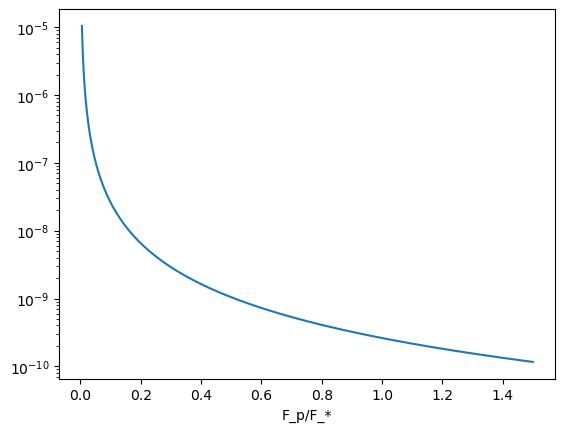

In [24]:
plt.semilogy(a_array, fluxes)
plt.xlabel("a (AU)")
plt.ylabel("F_p/F_*")
plt.show()

In [14]:
Ag_earth = 0.434 # Jupiter: 0.538; Earth: 0.434
Rp_earth = 0.091 # Jupiter: 1; Earth: 0.091 (approx)
a_earth = 1. # Jupiter: 5.2034; Earth: 1

Ag_jup = 0.538
Rp_jup = 1.
a_jup = 5.2034

ratio_earth = flux_ratio_refl(Ag = Ag_earth, Rp = Rp_earth, a = a_earth, ang_phase=np.pi/2)
ratio_jup = flux_ratio_refl(Ag = Ag_jup, Rp = Rp_jup, a = a_jup, ang_phase=np.pi/2)

In [15]:
print(ratio_earth)
print(ratio_jup)

2.612688039725893e-10
1.4445177855866922e-09


In [8]:
spectrum = get_spectrum(
    T_eff=5800, log_g=4.5, cache=False
)

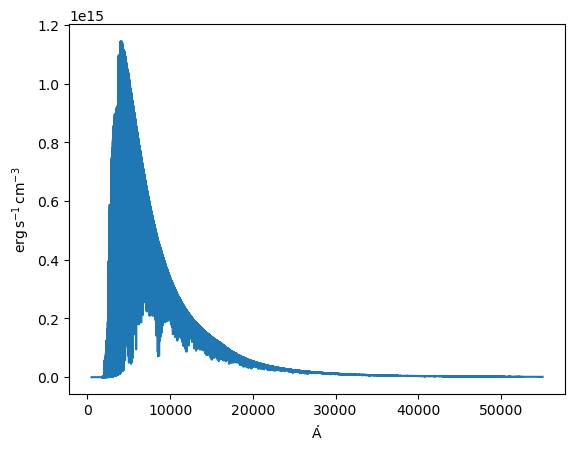

In [10]:
with quantity_support():
    plt.plot(spectrum.wavelength, spectrum.flux)